<a href="https://colab.research.google.com/github/Ghost21899/fmml-2022/blob/main/assignments/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

FMML Module 1, Lab 1 <br>
 Module Coordinator: Amit Pandey ( amit.pandey@research.iiit.ac.in ) <br>
 Release date: Jan 2022 <br>



### In this notebook we will be covering the very basics of Python and some basic libraries such as Numpy, Matplotlib and Nltk.

#### Section 1 - Python : Basic data types and indexing.

In [1]:
## Strings 

name = 'First Lab'
name_extended = name + 'Module 1'

## List
name_list = ['First Lab', 3 , '1.1' , 'Lab 1']
name_list.extend(['Module 1'])

## Tuples

name_tuple = ('First Lab', 1)

## Sets

set_unique = set([1,1,2,3,5,6,'Lab1'])

## Dictionary

dic = {'1': 'A','2':'B', 'C':3 } ##Observe how key and values can be anything
dic['4'] ='New'




In [2]:
print(name , name_extended)
print(name_list)
print(name_tuple)
print(set_unique)
print(dic)


First Lab First LabModule 1
['First Lab', 3, '1.1', 'Lab 1', 'Module 1']
('First Lab', 1)
{1, 2, 3, 5, 6, 'Lab1'}
{'1': 'A', '2': 'B', 'C': 3, '4': 'New'}


In [3]:
print(name[-1]) # last element
print(name_tuple[-2]) # second last element, incidently 0th element.
print(dic['1'])

b
First Lab
A


#### Section 2 - Functions

In [4]:
def add_new(*args):
  return sum(args)

ans = add_new(1,2,3,4,3,2,4,5,7,84)
print(ans)

115


In [5]:
def check_even_list(num_list):
    
    even_numbers = [i for i in num_list if i % 2 == 0]    
    return even_numbers

print(check_even_list([1,2,3,4,6,8,9,10]))

[2, 4, 6, 8, 10]


In [6]:
# Question 1 : 

# Given a list having Names, work_hours, and gender, Write a function to print name of the female worker that worked the most hours. Also how much do should she be paid if the pay is $ 20 per hour.
def remove_men(ele):
  return True if ele[2] == 'F' else False

work_hours = [('Abby',100 , 'F'),('Billy',400, 'M'),('Cassie',800,'F'), ('Maggi',600,'F'),('Alex',500,'M'),('Raj',225,'M'),('Penny',920,'F'),('Ben',300,'M')]
work_hours = list(filter(remove_men, work_hours))
print(work_hours)
work_hours.sort(key = lambda x: x[1], reverse = True)
print(work_hours)
hard_worker = work_hours[0]
print(f'The name of the worker is {hard_worker[0]} and she shoukd be paid ${hard_worker[1] * 20}')

[('Abby', 100, 'F'), ('Cassie', 800, 'F'), ('Maggi', 600, 'F'), ('Penny', 920, 'F')]
[('Penny', 920, 'F'), ('Cassie', 800, 'F'), ('Maggi', 600, 'F'), ('Abby', 100, 'F')]
The name of the worker is Penny and she shoukd be paid $18400


#### Section 3 - Libraries and Reading data.

#### Numpy - One of the most used libraries - supports for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [7]:
import numpy as np

In [8]:

a = np.array([1,1,2,3,4,5,5,6]) ## np.array converts given list to array

b = a>1

print(b)
print(a[b])


[False False  True  True  True  True  True  True]
[2 3 4 5 5 6]


In [9]:
a_range = np.arange(10,19).reshape(3,3)
a_range


array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [10]:
a_range[0] # printing all the columns of first row

array([10, 11, 12])

In [11]:
a_range[:,2] #printing all the rows of second column

array([12, 15, 18])

In [12]:
iden = np.eye(3) #idnetity matrix of given size
iden

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [13]:
summed = a_range + iden
summed


array([[11., 11., 12.],
       [13., 15., 15.],
       [16., 17., 19.]])

In [14]:
mul = a_range@iden ## normal multiplication
mul


array([[10., 11., 12.],
       [13., 14., 15.],
       [16., 17., 18.]])

In [15]:
## point wise multiplication
p_mul = a_range * iden
p_mul

array([[10.,  0.,  0.],
       [ 0., 14.,  0.],
       [ 0.,  0., 18.]])

In [16]:
mtx_t = mul.T
mtx_t


array([[10., 13., 16.],
       [11., 14., 17.],
       [12., 15., 18.]])

In [17]:
mtx_t[2] = mtx_t[2]*[1,2,3] ## indexing, point wise multiplication and broadcasting
mtx_t

array([[10., 13., 16.],
       [11., 14., 17.],
       [12., 30., 54.]])

In [18]:
mtx_t[(mtx_t % 2 == 0)] = 0 ## conveert even elements of the matrix to zero.
mtx_t

array([[ 0., 13.,  0.],
       [11.,  0., 17.],
       [ 0.,  0.,  0.]])

In [19]:
# Question 2 : 

# a)Create a 5x5 matrix of the following form, 

# [[1,1]
#  [2,2]]

#  i.e. each row is increasing and has repetive elements.

#  Hint : you can use hstack, vstack  etc.

def increasing_matrix(n):
  result = None
  for i in range(1, n+1):
    temp = np.array([i]*n)
    if result is not None:
      result = np.vstack((result, temp)) 
    else:
      result = temp.copy()

  return result

print(increasing_matrix(5))

 
# b) find dot product of the matrix with any matrix. (Figure out the size/ shape of the matrix)
def dot_product(a, b):
  if a.shape[1] == b.shape[0]:
    return np.dot(a,b)
  elif b.shape[1] == a.shape[0]:
    return np.dot(b,a)
  else: 
    print("Check the shape of the matrix")

x = np.random.randint(10, size=(3,2))
y = np.random.randint(100, size=(2,3))
print(x)
print(y)
print(dot_product(x, y))

[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]
[[1 4]
 [9 4]
 [4 6]]
[[ 3 73 27]
 [ 2 39 69]]
[[ 11 229 303]
 [ 35 813 519]
 [ 24 526 522]]


#### Reading Files

In [20]:
## loading from the google drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
with open ('/content/sample_data/README.md', 'r') as f:
  a = f.readlines()

a ## here a is list of elements/strings each splitted at \n, \n is also part of the list element. 


['This directory includes a few sample datasets to get you started.\n',
 '\n',
 '*   `california_housing_data*.csv` is California housing data from the 1990 US\n',
 '    Census; more information is available at:\n',
 '    https://developers.google.com/machine-learning/crash-course/california-housing-data-description\n',
 '\n',
 '*   `mnist_*.csv` is a small sample of the\n',
 '    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is\n',
 '    described at: http://yann.lecun.com/exdb/mnist/\n',
 '\n',
 '*   `anscombe.json` contains a copy of\n',
 "    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it\n",
 '    was originally described in\n',
 '\n',
 "    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American\n",
 '    Statistician. 27 (1): 17-21. JSTOR 2682899.\n',
 '\n',
 '    and our copy was prepared by the\n',
 '    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c7315

In [22]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_test.csv','r')
df.head(10) ## pass as argument number of top elements you wish to print. Head is used to have a quick glance and understand the data.

,"longitude,""latitude"",""housing_median_age"",""total_","ooms"",""total_bed","ooms"",""population"",""households"",""median_income"",""median_house_value"""
0,"-122.050000,37.370000,27.000000,3885.000000,66...",NaN,NaN
1,"-118.300000,34.260000,43.000000,1510.000000,31...",NaN,NaN
2,"-117.810000,33.780000,27.000000,3589.000000,50...",NaN,NaN
3,"-118.360000,33.820000,28.000000,67.000000,15.0...",NaN,NaN
4,"-119.670000,36.330000,19.000000,1241.000000,24...",NaN,NaN
5,"-119.560000,36.510000,37.000000,1018.000000,21...",NaN,NaN
6,"-121.430000,38.630000,43.000000,1009.000000,22...",NaN,NaN
7,"-120.650000,35.480000,19.000000,2310.000000,47...",NaN,NaN
8,"-122.840000,38.400000,15.000000,3080.000000,61...",NaN,NaN
9,"-118.020000,34.080000,31.000000,2402.000000,63...",NaN,NaN


In [23]:
len(df.columns), df.columns

(3,
 Index(['longitude,"latitude","housing_median_age","total_', 'ooms","total_bed',
        'ooms","population","households","median_income","median_house_value"'],
       dtype='object'))

In [24]:
df.columns[0]

'longitude,"latitude","housing_median_age","total_'

In [25]:
df['longitude,"latitude","housing_median_age","total_'][:5] 

0    -122.050000,37.370000,27.000000,3885.000000,66...
1    -118.300000,34.260000,43.000000,1510.000000,31...
2    -117.810000,33.780000,27.000000,3589.000000,50...
3    -118.360000,33.820000,28.000000,67.000000,15.0...
4    -119.670000,36.330000,19.000000,1241.000000,24...
Name: longitude,"latitude","housing_median_age","total_, dtype: object

In [26]:
df = df.rename(columns = {'longitude,"latitude","housing_median_age","total_':'Detail1'}) ##rename column names as at times it makes it easier for us

In [27]:
df.head(3)

,Detail1,"ooms"",""total_bed","ooms"",""population"",""households"",""median_income"",""median_house_value"""
0,"-122.050000,37.370000,27.000000,3885.000000,66...",NaN,NaN
1,"-118.300000,34.260000,43.000000,1510.000000,31...",NaN,NaN
2,"-117.810000,33.780000,27.000000,3589.000000,50...",NaN,NaN


In [28]:
df.iloc[:5, 0]  ##iloc - index - 0 to 4 rows and first column only.

0    -122.050000,37.370000,27.000000,3885.000000,66...
1    -118.300000,34.260000,43.000000,1510.000000,31...
2    -117.810000,33.780000,27.000000,3589.000000,50...
3    -118.360000,33.820000,28.000000,67.000000,15.0...
4    -119.670000,36.330000,19.000000,1241.000000,24...
Name: Detail1, dtype: object

In [29]:
import matplotlib
from matplotlib import pyplot as plt

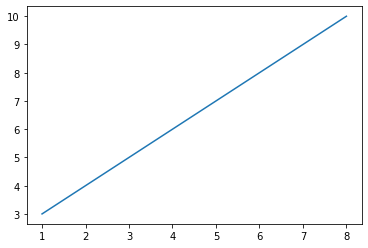

In [30]:
xpoints = np.array([1, 8])
ypoints = np.array([3, 10])

plt.plot(xpoints, ypoints)
plt.show()

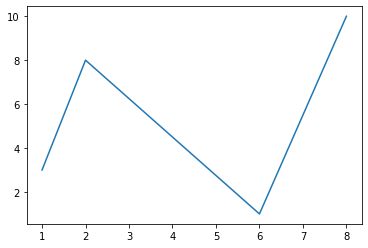

In [31]:
xpoints = np.array([1, 2, 6, 8])
ypoints = np.array([3, 8, 1, 10])

plt.plot(xpoints, ypoints)
plt.show()

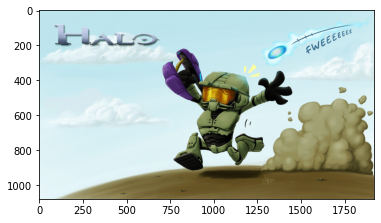

In [33]:
## Question 3 : Upload an image to your google drive, Use plt.imread to read image from the google drive and then print that image using plt.imshow

img = plt.imread('/content/drive/MyDrive/Halo_funny.jpg')
plt.imshow(img)